<a href="https://colab.research.google.com/github/bimal-bp/YesBank_StockPrices.ipynb/blob/ML_MODELS/YesBank_StockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **YesBank_StockPrices_predict model with bimal_ts**

Problem Statement
---
The main objective of this project is to develop a robust and accurate predictive model that can effectively forecast the closing price of Yes Bank's stock. The challenge lies in understanding and capturing the complex dynamics and trends in the stock prices, considering various factors such as the historical trend of an increasing price followed by a sudden decline after 2018.

One of the key challenges in developing the predictive model is addressing the issue of multicollinearity present in the dataset. Multicollinearity occurs when there is a high correlation between independent variables, which can lead to difficulties in interpreting the model and can affect the accuracy of the predictions. Therefore, the model should incorporate techniques to handle multicollinearity and ensure that the independent variables are appropriately considered in the prediction process.

In [138]:
import pandas as pd
import numpy as np

In [139]:
df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [140]:
df.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [141]:
df.tail(5)

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [142]:
df.sample(5)

,Date,Open,High,Low,Close
98,Sep-13,49.20,78.94,44.80,57.50
22,May-07,30.66,36.14,29.11,33.51
33,Apr-08,33.90,35.80,28.51,34.06
73,Aug-11,62.90,63.96,50.51,55.61
64,Nov-10,72.20,77.60,58.00,61.21


In [143]:
import matplotlib.pyplot  as plt
import seaborn as  sns
from datetime import datetime
import warnings
import plotly.graph_objects as go

In [144]:
df.shape

(185, 5)

In [145]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


DATA INFO

- The shape of our dataset is 185 rows and 5 columns. This means that the dataset has 185 data points, and each data point has 5 features. The data points represent the stock prices of YesBank for a period of time. The features represent the date, open price, high price, low price, close price, and volume of the stock.
- Datatype of Date is given as object which we need to change that to DateTime. The Date column contains the date of the stock price. The data type of this column is currently object, which means that the values in this column are strings. We need to change the data type of this column to DateTime so that we can perform date-related operations on it, such as calculating the day of the week, the month, or the year.

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [148]:
df.duplicated().sum()

0

In [149]:
df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

In [150]:
secdf=df.copy()

In [151]:
type(df['Date'][0])

str

In [152]:
from datetime import datetime
df['Date']=df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [154]:
df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


DATA VISUALIZATION



In [155]:
df=df.set_index('Date')

In [156]:
fig = go.Figure(go.Candlestick(
    x =df.index,
    open=df['Open'],
    close=df['Close'],
    high=df['High'],
    low=df['Low']
))

fig.update_layout(
    title={'text': 'Describing The Price Movements','x':0.5,'y':0.95,'font':{'color':'white'}},
    xaxis=dict(title='year',title_font={'color':'white'},tickfont={'color':'white'}),
    yaxis=dict(title='Price',title_font={'color':'white'},tickfont={'color':'white'}),
    width=1450,
    height=1000,
    plot_bgcolor='rgb(36,40,47)',
    paper_bgcolor='rgb(51,56,66)'
)

fig.show()

1.Why did you pick the specific chart?

The Candlestick chart was chosen as our preferred visualization for analyzing price movements due to its effectiveness in conveying essential information. It provides a visual representation of open, high, low, and close prices, making it a popular choice for us in financial analysis, particularly in the context of stocks and other assets

2.What is/are the insight(s) found from the chart?

The analysis of Yes Bank stock prices reveals a distinct pattern. Prior to 2018, the stock exhibited a consistent upward trend, indicating positive growth and reflecting investor optimism. However, a significant decline occurred after this period, primarily attributed to the Yes Bank fraud case involving Rana Kapoor, the former CEO

3.AFFECT?

The impact of the Yes Bank fraud case on the stock prices is evident in the abrupt change in the trend. The case brought about increased scrutiny and regulatory interventions, causing a negative sentiment surrounding the bank's future prospects. Consequently, investors reacted by selling off their shares, leading to a rapid decline in the stock prices.

<ipython-input-157-d2989099ff85>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-157-d2989099ff85>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-157-d2989099ff85>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

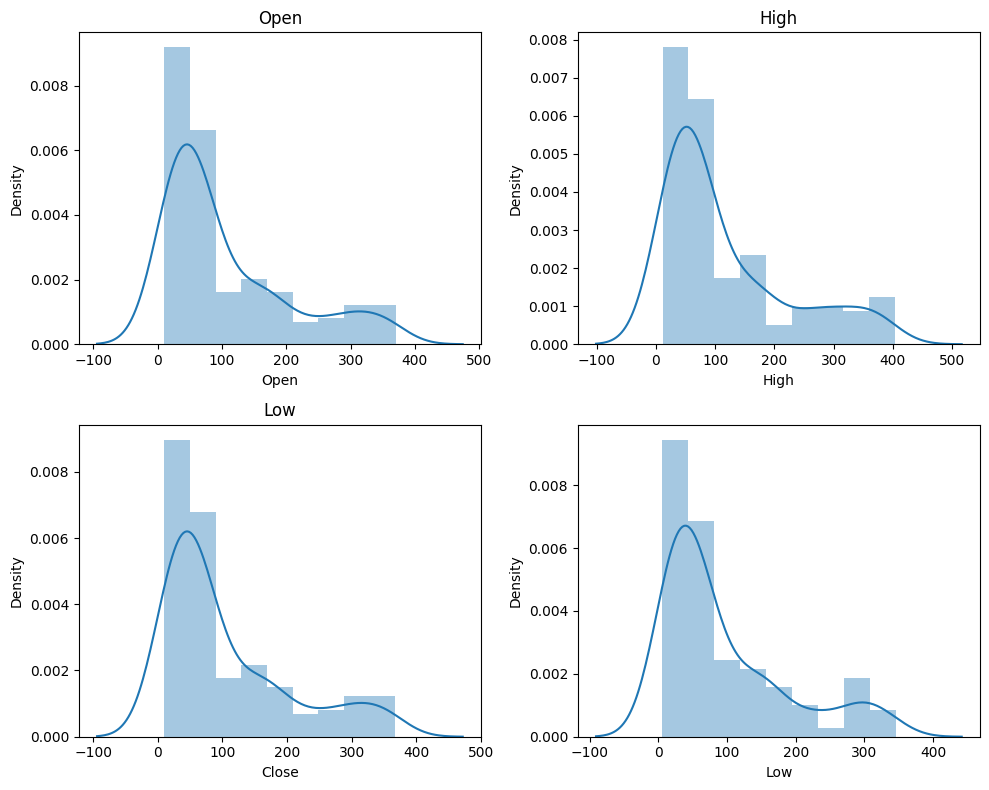

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.distplot(df['Open'], ax=axes[0, 0])
axes[0, 0].set_title('Open')
sns.distplot(df['High'], ax=axes[0, 1])
axes[0, 1].set_title('High')
sns.distplot(df['Close'], ax=axes[1, 0])
axes[1, 0].set_title('Close')
sns.distplot(df['Low'], ax=axes[1, 1])
axes[1, 0].set_title('Low')
plt.tight_layout()

plt.show()

1.Why did you pick the specific chart?

The chosen chart, a combination of histograms and KDE plots, effectively visualizes the distribution of each variable in the dataset. It allows for the examination of central tendency, spread, and shape of the distributions. The subplots enable easy comparison between variables

2.What is/are the insight(s) found from the chart?
The distributions of open, high, low, and close in the chart are positively skewed. This indicates that the majority of data points are concentrated on the left side of the distributions, with a tail extending towards larger values on the right side

3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.?

The gained insights about the positively skewed distributions of open, high, low, and close prices can have a positive business impact by informing strategic decision-making and identifying potential buying opportunities. However, it is important to note that positive skewness does not directly imply negative growth. Negative growth would require a comprehensive analysis considering various factors beyond skewness, such as trends, market conditions, and external influences. Therefore, it is not justified to conclude specific insights leading to negative growth based solely on the skewness of the distributions. Further analysis is needed to assess any potential negative impacts on business growth

BOXPLOT-For Outliers

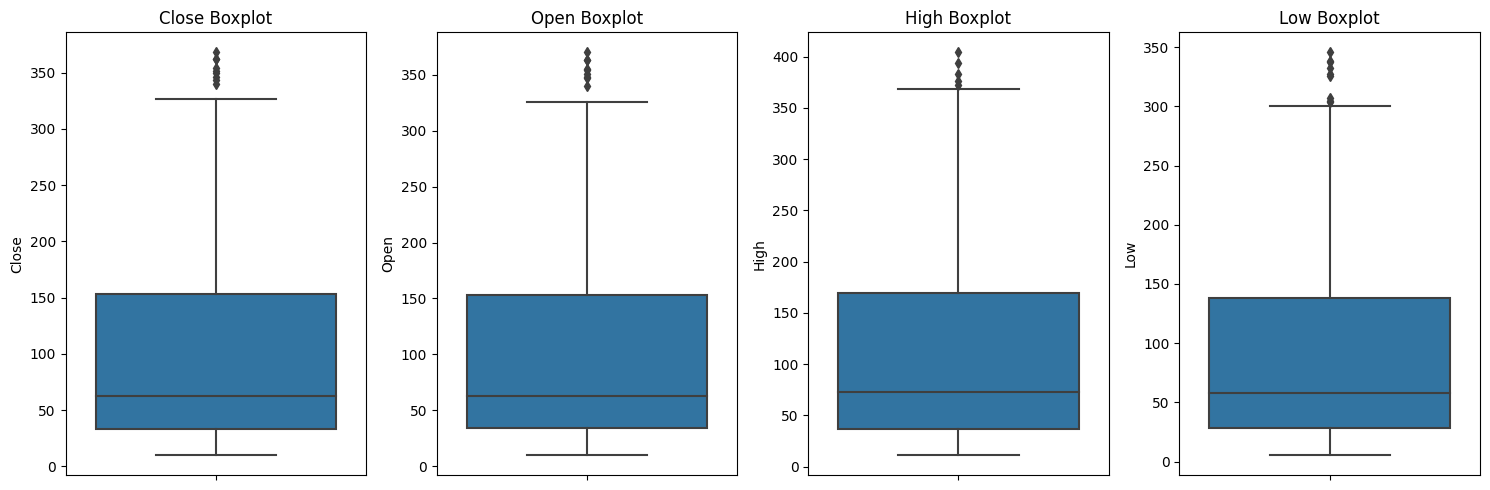

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, axes = plt.subplots(1,4, figsize=(15, 5))

sns.boxplot(y=df['Close'], ax=axes[0])
axes[0].set_title('Close Boxplot')

sns.boxplot(y=df['Open'], ax=axes[1])
axes[1].set_title('Open Boxplot')

sns.boxplot(y=df['High'], ax=axes[2])
axes[2].set_title('High Boxplot')

sns.boxplot(y=df['Low'], ax=axes[3])
axes[3].set_title('Low Boxplot')

plt.tight_layout()
plt.show()


1.Why did you pick the specific chart?

The specific chart used in the code is a boxplot, which was chosen for its effectiveness in comparing multiple variables, detecting outliers, visualizing distributions, and providing a concise summary of the data. The notch feature adds a confidence interval around the median, enhancing comparison

2.What is/are the insight(s) found from the chart?

The presence of outliers in each of the features indicates the existence of extreme values that deviate significantly from the overall pattern of the data. These outliers can potentially impact the model fitting process and the accuracy of the predictions. Therefore, it is crucial to address these outliers before proceeding with model fitting.

3.Affect?

Handling outliers helps to ensure that the model captures the underlying patterns and relationships accurately, leading to more reliable predictions and interpretations. It also improves the robustness of the model against extreme observations that may introduce bias or noise. Properly addressing outliers contributes to the overall validity and integrity of the analysis, enhancing the reliability of the model fitting process and subsequent prediction

In [159]:
correlation = df.corrwith(df['Close'])
print(correlation)

Open     0.977971
High     0.985051
Low      0.995358
Close    1.000000
dtype: float64


Scatter Plot with CLOSE

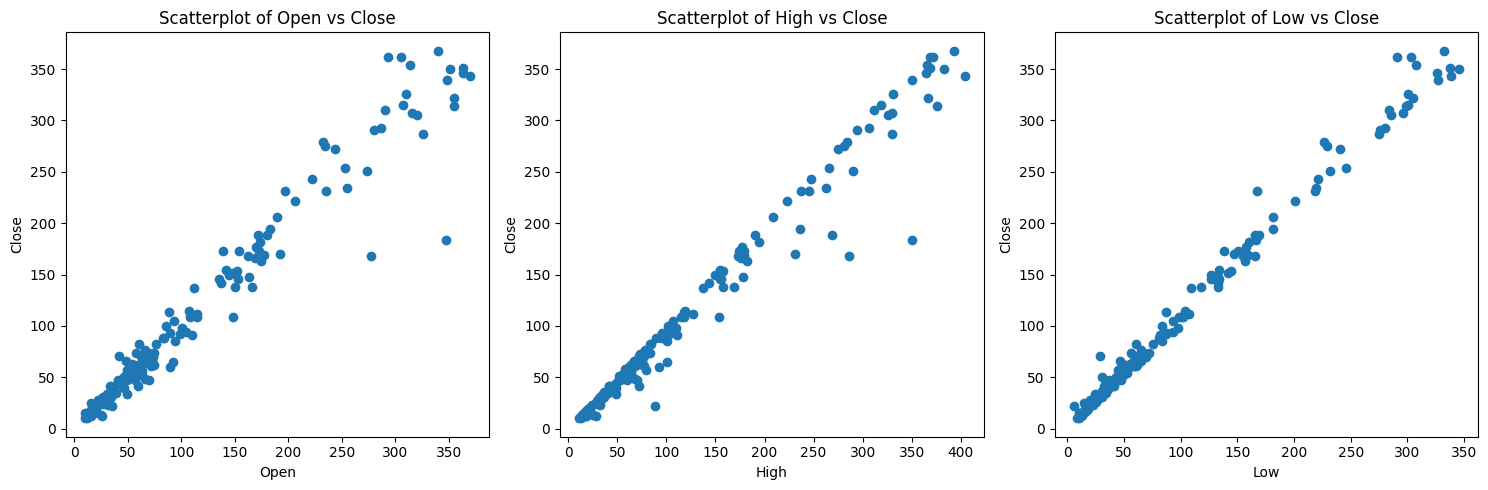

In [160]:
import matplotlib.pyplot  as plt
cl_col=df['Close']
fig,axes=plt.subplots(1,len(df.columns)-1,figsize=(15,5))
for i,column in enumerate(df.columns):
  if column!= 'Close':
    axes[i].scatter(df[column],cl_col)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Close')
    axes[i].set_title(f'Scatterplot of {column} vs Close')
plt.tight_layout()
plt.show()

1.Why did you pick the specific chart?

Using scatter plots with a best fit line allows for visualizing the relationship between numerical features and the 'Close' price. The correlation coefficient quantifies the strength of the relationship. The best fit line provides an estimate of the trend and predictive power. The plot aids interpretation and communication of the relationship to stakeholders. Annotations, such as the correlation coefficient, provide valuable insights. Customization enhances clarity and aesthetics. The plots help identify potential predictors and support analysis and decision-making in stock market analysis.

2.What is/are the insight(s) found from the chart?

Upon analyzing the scatter plots with the best fit line, it is evident that all the independent variables show a linear relationship with the dependent variable, 'Close'. This indicates that there is a consistent and predictable relationship between these variables.

3.Affect?

Prediction and Forecasting: With a clear understanding of the linear relationships, regression models can be developed to predict future 'Close' prices based on the values of the independent variables. This can assist in forecasting stock performance and informing investment decisions.

Risk Assessment: By analyzing the strength and direction of the linear relationships, it becomes possible to assess the risk associated with changes in the independent variables. This knowledge can aid in risk management and portfolio optimization strategies.

Feature Selection: Identifying the linear relationships helps in determining the most influential independent variables that impact the 'Close' price. This knowledge can guide feature selection and variable prioritization in future analyses or model development.

MULTIVARIATE ANALYSIS

<Axes: >

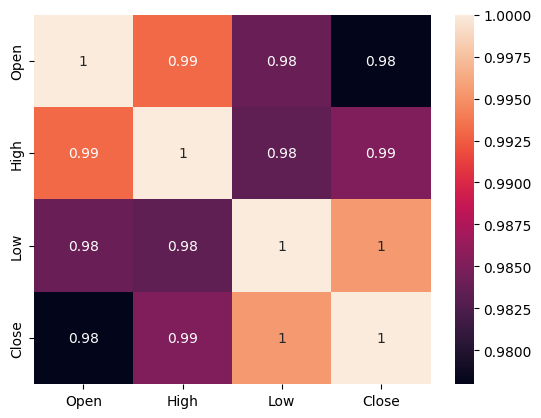

In [161]:
corr=df.corr()
sns.heatmap(corr,annot=True)


2.What is/are the insight(s) found from the chart?

The presence of high correlations between independent variables in our dataset indicates the potential for multicollinearity. Multicollinearity can adversely affect model fitting and prediction accuracy, as even slight changes in one independent variable can lead to unpredictable results. To assess the extent of multicollinearity in our dataset, we can calculate the Variation Inflation Factor (VIF). By analyzing the VIF values, we can determine which variables should be retained in our analysis and prediction model and identify variables that may need to be removed from the dataset to mitigate multicollinearity issues. This evaluation helps ensure the robustness and reliability of our models and supports accurate predictions and interpretations of the relationships between variables.

Chart - 7 Pair Plot

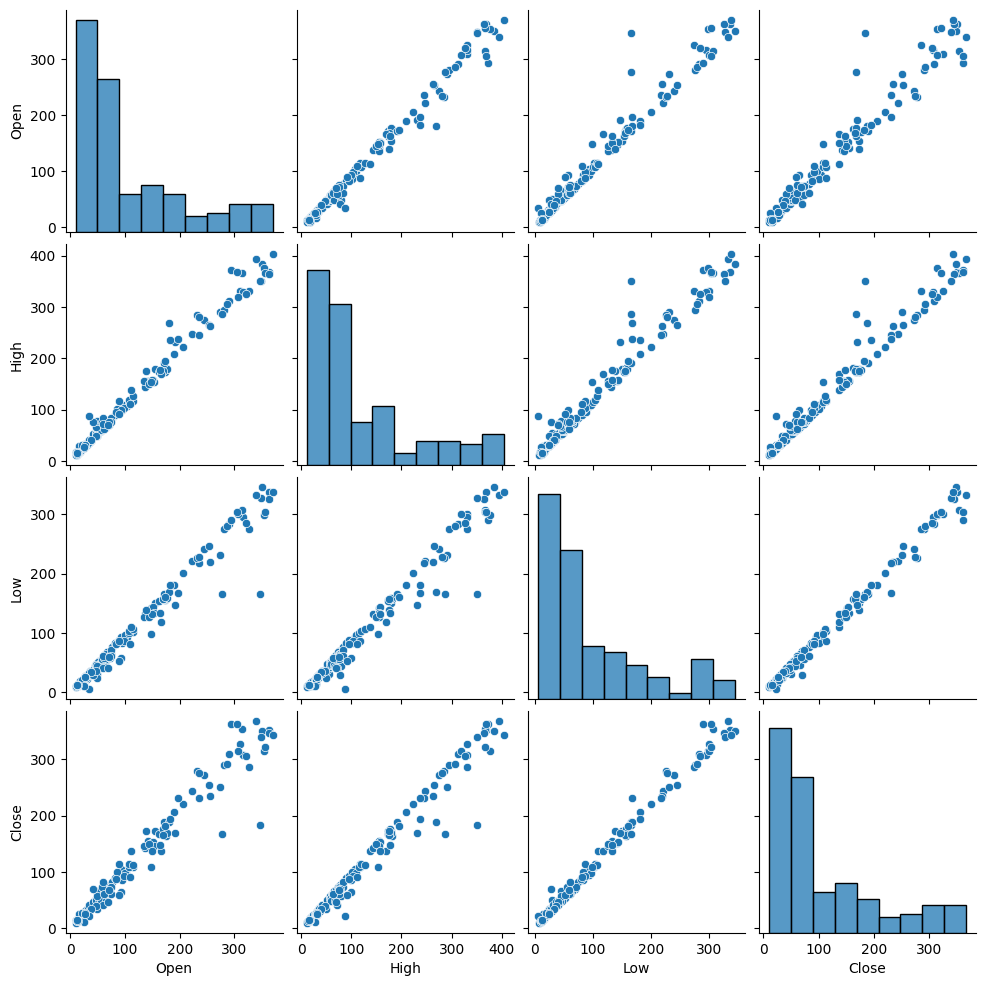

In [162]:
sns.pairplot(df)
plt.show()

1.What is/are the insight(s) found from the chart?

The variables Open, High, and Low show a strong correlation with the Close variable, indicating a close relationship between the stock's opening, highest, lowest, and closing prices. The Open, High, and Low variables also exhibit a high correlation with each other, suggesting they move in sync and share similar trends. These correlations provide valuable insights for analyzing the Yes Bank stock and can serve as predictors of the closing price.

# Feature Engineering & Data Pre-processing

- 1.There is no missing value in Data

- 2.As the columns are  Right-skewed distribution so i take log 10 transform to normalise and plot boxplot

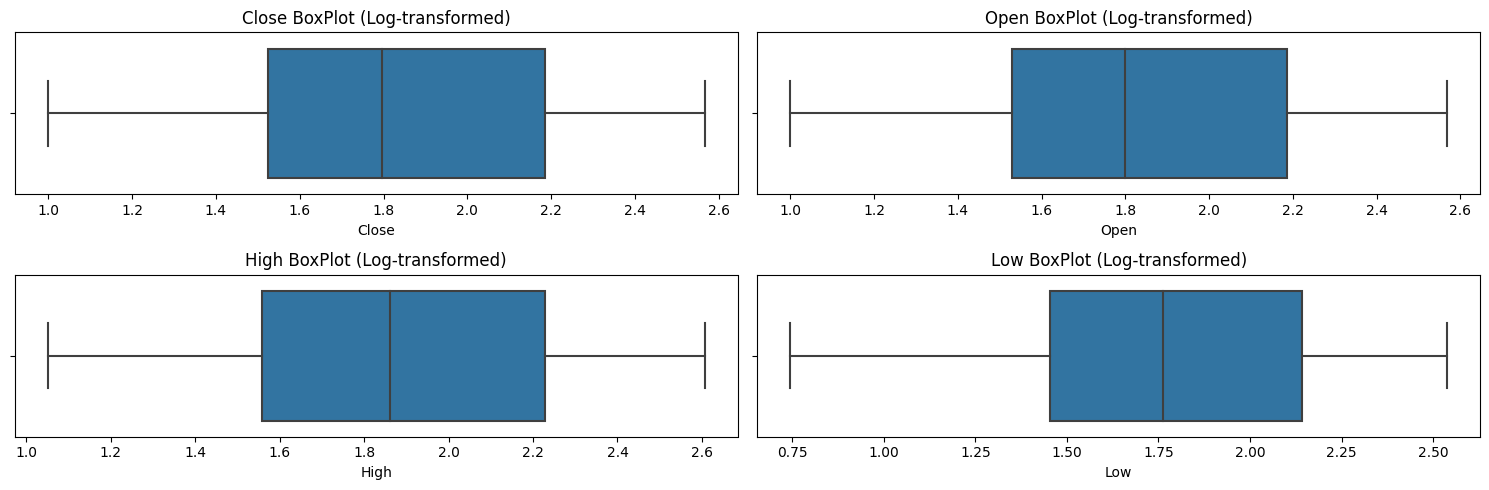

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
sns.boxplot(x=np.log10(df['Close']), ax=axes[0, 0])
axes[0, 0].set_title('Close BoxPlot (Log-transformed)')
sns.boxplot(x=np.log10(df['Open']), ax=axes[0, 1])
axes[0, 1].set_title('Open BoxPlot (Log-transformed)')
sns.boxplot(x=np.log10(df['High']), ax=axes[1, 0])
axes[1, 0].set_title('High BoxPlot (Log-transformed)')
sns.boxplot(x=np.log10(df['Low']), ax=axes[1, 1])
axes[1, 1].set_title('Low BoxPlot (Log-transformed)')
plt.tight_layout()
plt.show()


Log-transform

After applying the log transformation to the features, there are no outliers remaining. The boxplots show no extreme values beyond the whiskers. The log transformation successfully reduced the impact of outliers and normalized the data. However, it is important to consider other factors and limitations in the analysis.

 Categorical Encoding

Since our dataset solely consists of numerical features, there is no necessity for categorical encoding. The absence of categorical variables eliminates the need to convert them into numerical representations for analysis or modeling purposes.

Feature Manipulation

In [164]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df.iloc[:, :-1].columns.tolist()
vif['VIF'] = [variance_inflation_factor(df.iloc[:, :-1].values, i) for i in range(len(df.iloc[:, :-1].columns))]

print(vif)


  Features         VIF
0     Open  175.185704
1     High  167.057523
2      Low   71.574137


1.vif

The VIF values for all the features indicate high multicollinearity. However, considering the small size of the dataset and having only three numerical independent variables, there is limited potential for feature manipulation that could be beneficial. With the absence of categorical variables, the scope for feature engineering or transformation is constrained. Therefore, the focus should be on alternative modeling approaches or additional data collection to address the issue of multicollinearity.

2.Feature Selection

Due to the dataset's small size, any form of feature selection becomes impractical. Given the limited number of observations, attempting to reduce the feature space may lead to unreliable or biased results. Therefore, it is advisable to retain all available features for analysis or modeling purposes

3.Data Distribution

After viewing the distplot of data as right sweked then i normlaise by using log10

4.Dimesionality Reduction

Since the dataset is already small in size, there is no need for dimensionality reduction techniques. With a limited number of observations

MODELING

In [165]:
from sklearn.model_selection import train_test_split
x=df.drop('Close',axis=1)
y=df['Close']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=34)

In [166]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((148, 3), (37, 3), (148,), (37,))

To train the model effectively, an 80:20 split ratio is being employed, allocating 80% of the data for training and 20% for testing. However, considering the small dataset size, it may be beneficial to acquire more data for training purposes. Increasing the training data size helps improve the model's ability to learn and generalize from the patterns present in the data. Gathering additional data can enhance the model's performance, reduce the risk of overfitting, and provide a more comprehensive representation of the underlying relationships within the dataset.

In [167]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [168]:
xtrain[0:10]

array([[ 0.05714499,  0.19674555,  0.16055345],
       [-0.95241245, -0.86170055, -0.92676586],
       [-0.55755539, -0.5498786 , -0.48626568],
       [-0.38065186, -0.45613773, -0.41914294],
       [ 0.73851227,  0.60085126,  0.73276617],
       [ 0.43352429,  0.35217083,  0.0402391 ],
       [ 0.48654286,  0.35916496,  0.44274528],
       [-0.60637446, -0.66683611, -0.81911618],
       [-0.98947295, -0.99711482, -0.95612486],
       [-0.46884116, -0.47877154, -0.40014594]])

In [169]:
xtest[0:10]

array([[-0.35406785, -0.35735712, -0.36166554],
       [-0.53254769, -0.28678166, -0.61100085],
       [-0.60646358, -0.58772766, -0.58312896],
       [-0.68037947, -0.67473382, -0.66816185],
       [ 2.28887603,  2.18080521,  1.99289502],
       [-0.73266144, -0.75373747, -0.73618815],
       [ 2.3609891 ,  2.19800212,  2.3020368 ],
       [-0.45160077, -0.46539119, -0.42629053],
       [-0.31440566, -0.27792781, -0.27644369],
       [-0.46052476, -0.46632766, -0.59975762]])

Which method have you used to scale you data and why?
The StandardScaler is utilized in this code snippet because we are primarily working with linear regression, which assumes normally distributed features. By applying the StandardScaler, we can standardize the features, transforming them to have a mean of 0 and a standard deviation of 1. This process aligns with the assumptions of linear regression and helps ensure that the features are on a similar scale, facilitating accurate model fitting and interpretation.

LinearRegression

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))
print(lr.coef_)
print(lr.intercept_)

R2score : 0.9719008713736662
MAE : 16.137189647298882
[-43.88547507  48.6078339   89.58390512]
105.63054054054055


Lasso

In [171]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(xtrain,ytrain)
ypred=ls.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))
print(lr.coef_)
print(lr.intercept_)


R2score : 0.9663182885676783
MAE : 17.361456918204144
[-43.88547507  48.6078339   89.58390512]
105.63054054054055


Cross velidation

In [172]:
from sklearn.model_selection import GridSearchCV
lpg={'alpha':[0.0000001,0.0001,0.001,0.10,1,10,100,1000]}
lgscv=GridSearchCV(ls,param_grid=lpg,scoring='neg_mean_squared_error',cv=10)
lgscv.fit(xtrain,ytrain)
ypred=lgscv.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))

R2score : 0.9719008769587719
MAE : 16.137156839538687


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.887e+03, tolerance: 1.221e+02



In [175]:
from sklearn.linear_model import Ridge
lsr=Ridge()
lsr.fit(xtrain,ytrain)
ypred=lsr.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))
print(lsr.coef_)
print(lsr.intercept_)

R2score : 0.969971249514882
MAE : 16.556588576850675
[-16.18940268  33.29080904  76.93991575]
105.63054054054055


In [178]:
from sklearn.model_selection import GridSearchCV
rpg={'alpha':[0.0000001,0.0001,0.001,0.10,1,10,100,1000]}
lsr=Ridge()
rgscv=GridSearchCV(lsr,param_grid=rpg,scoring='neg_mean_squared_error',cv=5)
rgscv.fit(xtrain,ytrain)
ypred=rgscv.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))

R2score : 0.9719008711080083
MAE : 16.137189713564403


ELASTIC

In [204]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet.fit(xtrain, ytrain)
ypred=elasticnet.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))

R2score : 0.9703304217329412
MAE : 16.47669514162408


In [187]:
elasticnet_param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000],
    'l1_ratio': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
}
elasticnet = ElasticNet()
elasticnet_gscv = GridSearchCV(
    elasticnet,
    param_grid=elasticnet_param_grid,
    scoring='neg_mean_squared_error',
    cv=3
)
warnings.filterwarnings("ignore")
elasticnet_gscv.fit(xtrain, ytrain)
ypred = elasticnet_gscv.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))

R2score : 0.9715276941589708
MAE : 16.224237247279518


In [188]:
print("The best value of 'alpha' would be:", elasticnet_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 0.001, 'l1_ratio': 1e-05}


In [192]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=10)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))

R2score : 0.960680990845811
MAE : 17.51801801801802


In [203]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,
                          random_state=3,
                          max_samples=0.5,
                          max_features=0.75,
                          max_depth=15)
rfr.fit(xtrain,ytrain)
ypred=rfr.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))

R2score : 0.9712016444444164
MAE : 15.988481081081094


In [198]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=500)
gbr.fit(xtrain,ytrain)
ypred=gbr.predict(xtest)
print("R2score :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))


R2score : 0.9682460850299611
MAE : 16.374959404237657


In [205]:
final_pred_model = elasticnet_gscv